In [2]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
data = pd.read_csv('onlinefopd.csv')
data

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,23,Female,Single,Student,No Income,Post Graduate,2,12.9766,77.5993,560001,Yes,Positive,Yes
384,23,Female,Single,Student,No Income,Post Graduate,4,12.9854,77.7081,560048,Yes,Positive,Yes
385,22,Female,Single,Student,No Income,Post Graduate,5,12.9850,77.5533,560010,Yes,Positive,Yes
386,23,Male,Single,Student,Below Rs.10000,Post Graduate,2,12.9770,77.5773,560009,Yes,Positive,Yes


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
 12  Unnamed: 12                 388 non-null    object 
dtypes: float64(2), int64(3), object(8)


In [5]:
data.isnull().sum()

Age                           0
Gender                        0
Marital Status                0
Occupation                    0
Monthly Income                0
Educational Qualifications    0
Family size                   0
latitude                      0
longitude                     0
Pin code                      0
Output                        0
Feedback                      0
Unnamed: 12                   0
dtype: int64

<AxesSubplot:title={'center':'Food order by customer with respect to their Occupation'}, xlabel='Occupation', ylabel='Count'>

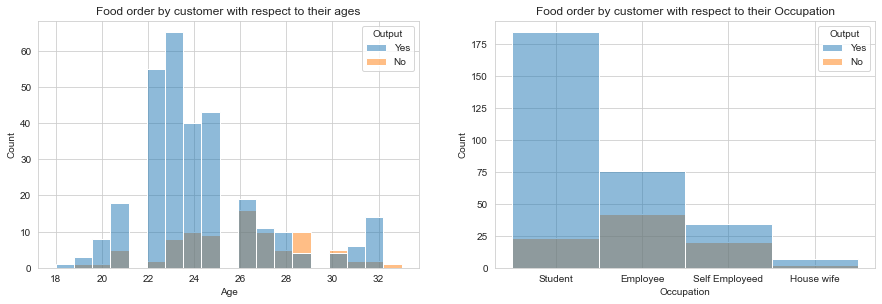

In [17]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.title('Food order by customer with respect to their ages')
sns.histplot(x="Age", hue="Output", data=data)

plt.subplot(2,2,2)
plt.title('Food order by customer with respect to their Occupation')
sns.histplot(x="Occupation", hue="Output", data=data)

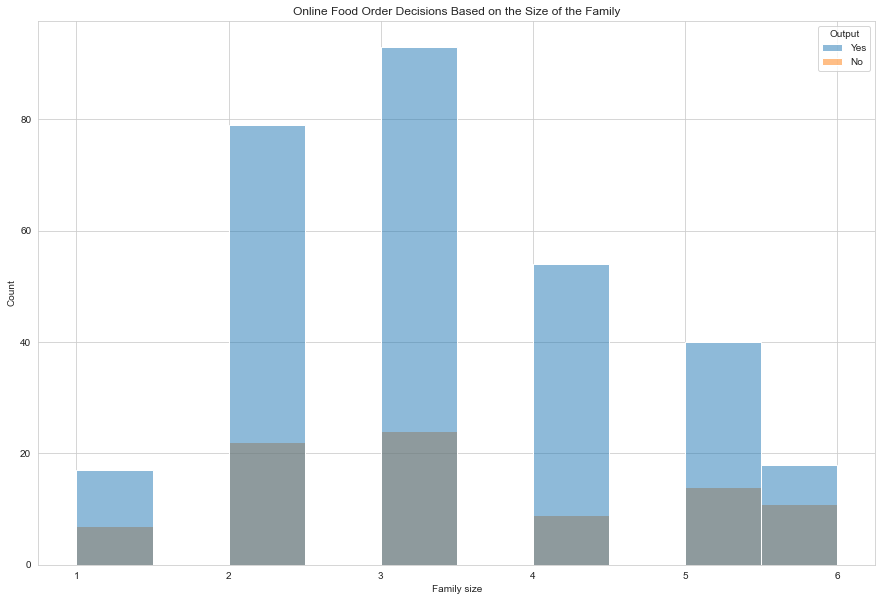

In [18]:
plt.figure(figsize=(15, 10))
plt.title("Online Food Order Decisions Based on the Size of the Family")
sns.histplot(x="Family size", hue="Output", data=data)
plt.show()

In [20]:
#customer who ordered the food again
buying_again = data.query("Output == 'Yes'")
buying_again

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,23,Female,Single,Student,No Income,Post Graduate,2,12.9766,77.5993,560001,Yes,Positive,Yes
384,23,Female,Single,Student,No Income,Post Graduate,4,12.9854,77.7081,560048,Yes,Positive,Yes
385,22,Female,Single,Student,No Income,Post Graduate,5,12.9850,77.5533,560010,Yes,Positive,Yes
386,23,Male,Single,Student,Below Rs.10000,Post Graduate,2,12.9770,77.5773,560009,Yes,Positive,Yes


In [27]:
plt.figure(figsize=(7,7))
gender = buying_again["Gender"].value_counts()
label = gender.index
counts = gender.values
colors = ['gold','lightgreen']

fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='Who Orders Food Online More: Male Vs. Female')
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=30,
                  marker=dict(colors=colors, line=dict(color='black')))
fig.show()

<Figure size 504x504 with 0 Axes>

In [31]:
marital = buying_again["Marital Status"].value_counts()
label = marital.index
counts = marital.values
colors = ['gold','blue']

fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='Who Orders Food Online More: Married Vs. Singles')
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='black', width=3)))
fig.show()

In [32]:
income = buying_again["Monthly Income"].value_counts()
label = income.index
counts = income.values
colors = ['gold','lightgreen']

fig = go.Figure(data=[go.Pie(labels=label, values=counts)])
fig.update_layout(title_text='Which Income Group Orders Food Online More')
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=30,
                  marker=dict(colors=colors, line=dict(color='black', width=3)))
fig.show()

In [33]:
#preprocessing the data

In [34]:
data["Gender"] = data["Gender"].map({"Male": 1, "Female": 0})
data["Marital Status"] = data["Marital Status"].map({"Married": 2, 
                                                     "Single": 1, 
                                                     "Prefer not to say": 0})
data["Occupation"] = data["Occupation"].map({"Student": 1, 
                                             "Employee": 2, 
                                             "Self Employeed": 3, 
                                             "House wife": 4})
data["Educational Qualifications"] = data["Educational Qualifications"].map({"Graduate": 1, 
                                                                             "Post Graduate": 2, 
                                                                             "Ph.D": 3, "School": 4, 
                                                                             "Uneducated": 5})
data["Monthly Income"] = data["Monthly Income"].map({"No Income": 0, 
                                                     "25001 to 50000": 5000, 
                                                     "More than 50000": 7000, 
                                                     "10001 to 25000": 25000, 
                                                     "Below Rs.10000": 10000})
data["Feedback"] = data["Feedback"].map({"Positive": 1, "Negative ": 0})
print(data.head())

   Age  Gender  Marital Status  Occupation  Monthly Income  \
0   20       0               1           1               0   
1   24       0               1           1           10000   
2   22       1               1           1           10000   
3   22       0               1           1               0   
4   22       1               1           1           10000   

   Educational Qualifications  Family size  latitude  longitude  Pin code  \
0                           2            4   12.9766    77.5993    560001   
1                           1            3   12.9770    77.5773    560009   
2                           2            3   12.9551    77.6593    560017   
3                           1            6   12.9473    77.5616    560019   
4                           2            4   12.9850    77.5533    560010   

  Output  Feedback Unnamed: 12  
0    Yes         1         Yes  
1    Yes         1         Yes  
2    Yes         0         Yes  
3    Yes         1         Yes  

In [35]:
#splitting data
from sklearn.model_selection import train_test_split
x = np.array(data[["Age", "Gender", "Marital Status", "Occupation", 
                   "Monthly Income", "Educational Qualifications", 
                   "Family size", "Pin code", "Feedback"]])
y = np.array(data[["Output"]])

In [61]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, 
                                                test_size=0.20, 
                                                random_state=42)

In [62]:
def model(xtrain,ytrain):
    
    #logreg
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state = 0)
    log.fit(xtrain,np.ravel(ytrain))
    
    #Kneighbors
    from sklearn.neighbors import KNeighborsClassifier
    kn = KNeighborsClassifier(n_neighbors = 9, metric = 'minkowski', p=2)
    kn.fit(xtrain,np.ravel(ytrain))
    
    #SVC(linear kernel)
    from sklearn.svm import SVC
    svc_lin = SVC(kernel = 'linear', random_state=0)
    svc_lin.fit(xtrain,np.ravel(ytrain))
    
    #SVC (RBF)
    from sklearn.svm import SVC
    svc_rbf = SVC(kernel= 'rbf', random_state = 0)
    svc_rbf.fit(xtrain,np.ravel(ytrain))
    
    #GaussianNB
    from sklearn.naive_bayes import GaussianNB
    gauss = GaussianNB()
    gauss.fit(xtrain,np.ravel(ytrain))
    
    #decision tree
    from sklearn.tree import DecisionTreeClassifier
    dec = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    dec.fit(xtrain,np.ravel(ytrain))
    
    #random forest
    from sklearn.ensemble import RandomForestClassifier
    fore = RandomForestClassifier(n_estimators = 12, criterion = 'entropy', random_state = 0)
    fore = fore.fit(xtrain,np.ravel(ytrain))
    
    print('[0]logistic regression training accuracy: ',log.score(xtrain,np.ravel(ytrain)))
    print('[1]kneighbors training accuracy: ',kn.score(xtrain,np.ravel(ytrain)))
    print('[2]linear kernel training accuracy: ',svc_lin.score(xtrain,np.ravel(ytrain)))
    print('[3]rbf training accuracy: ',svc_rbf.score(xtrain,np.ravel(ytrain)))
    print('[4]GaussianNB training accuracy: ',gauss.score(xtrain,np.ravel(ytrain)))
    print('[5]Decision tree training accuracy: ',dec.score(xtrain,np.ravel(ytrain)))
    print('[6]random forest training accuracy: ',fore.score(xtrain,np.ravel(ytrain)))
    
    
    
    return log, kn, svc_lin, svc_rbf, gauss, dec, fore

In [63]:
model = model(xtrain,ytrain)

[0]logistic regression training accuracy:  0.7580645161290323
[1]kneighbors training accuracy:  0.7645161290322581
[2]linear kernel training accuracy:  0.7580645161290323
[3]rbf training accuracy:  0.7580645161290323
[4]GaussianNB training accuracy:  0.8580645161290322
[5]Decision tree training accuracy:  1.0
[6]random forest training accuracy:  0.9903225806451613


In [64]:
from sklearn.metrics import confusion_matrix

for i in range(len(model)):
    cm = confusion_matrix(ytest, model[i].predict(xtest))
    
    TN, FP, FN, TP = confusion_matrix(ytest, model[i].predict(xtest)).ravel()
    
    test_score = (TP + TN)/( TN + FP + FN + TP)
    
    print(cm)
    print('model[{}] testing accuracy = "{}"' .format(i,test_score))
    print()

[[ 0 12]
 [ 0 66]]
model[0] testing accuracy = "0.8461538461538461"

[[ 6  6]
 [ 3 63]]
model[1] testing accuracy = "0.8846153846153846"

[[ 0 12]
 [ 0 66]]
model[2] testing accuracy = "0.8461538461538461"

[[ 0 12]
 [ 0 66]]
model[3] testing accuracy = "0.8461538461538461"

[[ 6  6]
 [10 56]]
model[4] testing accuracy = "0.7948717948717948"

[[ 9  3]
 [ 8 58]]
model[5] testing accuracy = "0.8589743589743589"

[[ 9  3]
 [ 4 62]]
model[6] testing accuracy = "0.9102564102564102"



In [68]:
print("Enter Customer Details to Predict If the Customer Will Order Again")
a = int(input("Enter the Age of the Customer: "))
b = int(input("Enter the Gender of the Customer (1 = Male, 0 = Female): "))
c = int(input("Marital Status of the Customer (1 = Single, 2 = Married, 3 = Not Revealed): "))
d = int(input("Occupation of the Customer (Student = 1, Employee = 2, Self Employeed = 3, House wife = 4): "))
e = int(input("Monthly Income: "))
f = int(input("Educational Qualification (Graduate = 1, Post Graduate = 2, Ph.D = 3, School = 4, Uneducated = 5): "))
g = int(input("Family Size: "))
h = int(input("Pin Code: "))
i = int(input("Review of the Last Order (1 = Positive, 0 = Negative): "))
features = np.array([[a, b, c, d, e, f, g, h, i]])
print("Finding if the customer will order again: ", model[6].predict(features))

Enter Customer Details to Predict If the Customer Will Order Again
Enter the Age of the Customer: 20
Enter the Gender of the Customer (1 = Male, 0 = Female): 1
Marital Status of the Customer (1 = Single, 2 = Married, 3 = Not Revealed): 2
Occupation of the Customer (Student = 1, Employee = 2, Self Employeed = 3, House wife = 4): 2
Monthly Income: 25000
Educational Qualification (Graduate = 1, Post Graduate = 2, Ph.D = 3, School = 4, Uneducated = 5): 1
Family Size: 5
Pin Code: 442312
Review of the Last Order (1 = Positive, 0 = Negative): 0
Finding if the customer will order again:  ['No']
